Label distribution:
label
1    17371
0     5495
Name: count, dtype: int64


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\valee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Logistic Regression Accuracy: 0.8390905115872321

Classification Report (Logistic Regression):

              precision    recall  f1-score   support

           0       0.81      0.44      0.57      1105
           1       0.84      0.97      0.90      3469

    accuracy                           0.84      4574
   macro avg       0.83      0.70      0.74      4574
weighted avg       0.83      0.84      0.82      4574



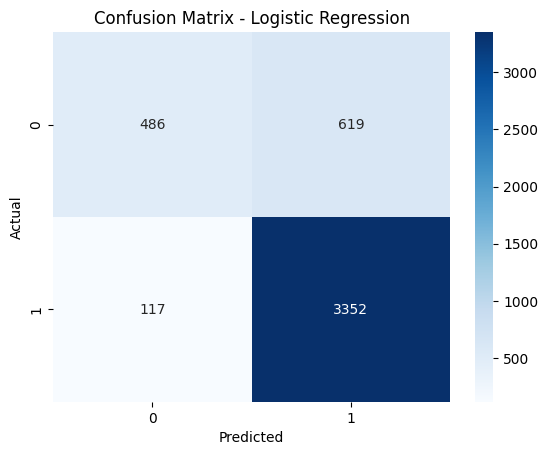


Naive Bayes Accuracy: 0.8379973764757324
Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.81      0.43      0.56      1105
           1       0.84      0.97      0.90      3469

    accuracy                           0.84      4574
   macro avg       0.83      0.70      0.73      4574
weighted avg       0.83      0.84      0.82      4574


Sample prediction: Real


In [1]:
# ✅ Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 🔃 Step 2: Load Dataset
df = pd.read_csv("FakeNewsNet.csv")

# 🧹 Step 3: Data Preprocessing
df = df.rename(columns={'real': 'label'})
df = df.dropna()
df['label'] = df['label'].astype(int)

# Show distribution
print("Label distribution:")
print(df['label'].value_counts())

# Clean text function
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # remove links
    text = re.sub(r'[^a-zA-Z ]', '', text)  # remove non-alphabetic characters
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['clean_title'] = df['title'].apply(clean_text)

# 🔀 Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df['clean_title'], df['label'], test_size=0.2, random_state=42)

# ✨ Step 5: TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

# 🤖 Step 6: Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

# 📊 Step 7: Evaluation
print("\nClassification Report (Logistic Regression):\n")
print(classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# 📈 Step 8: Naive Bayes Model
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)
y_pred_nb = nb.predict(X_test_vec)

print("\nNaive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report (Naive Bayes):\n", classification_report(y_test, y_pred_nb))

# 🧠 Step 9: Predict Your Own Headlines
def predict_news(text):
    cleaned = clean_text(text)
    vectorized = tfidf.transform([cleaned])
    result = model.predict(vectorized)
    return "Real" if result[0] == 1 else "Fake"

# Example
print("\nSample prediction:", predict_news("Breaking: Government unveils major new healthcare policy"))

